In [1]:
 # Import red wine data from UCI Machine Learning Repository

import pandas as pd

winedata=pd.read_csv("C:\\Users\\gunja\\OneDrive\\Desktop\\Estimate wine quality\\winequality-red.csv")

In [2]:
 # lets explore the data
winedata.head()

 #We have to predict the quality of the wine.We have here the wine attributes which will help us predict the same

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
 #Lets check the missing values if any
winedata.info()
  # Wow!!! no missing values.Wish life had been this simple!!
    
    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [4]:
#Lets check some basis stats of the data

winedata.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


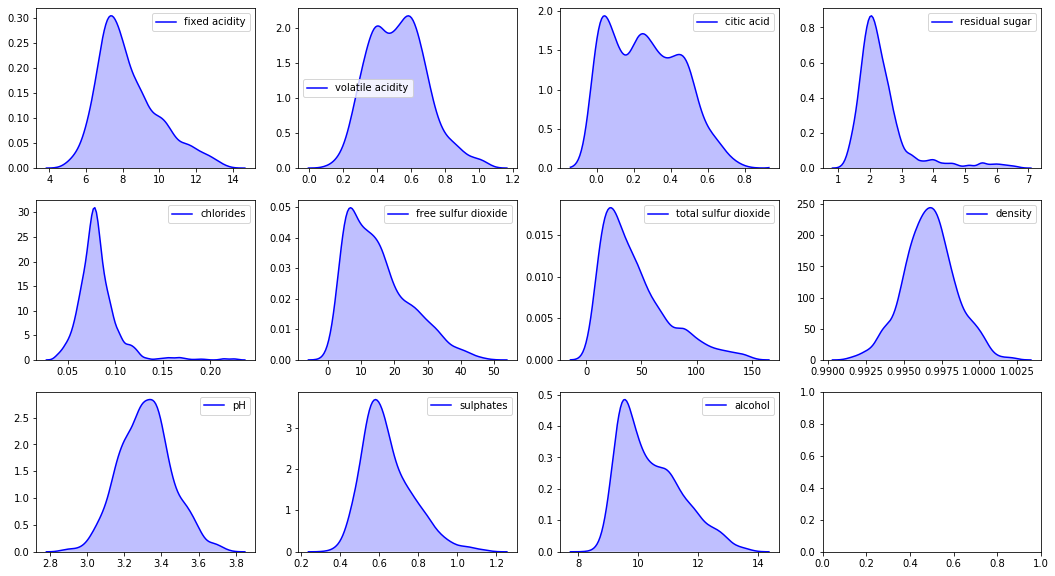

In [42]:
# Lets explore the distribution of the predictor variables though no assumption is made about the distribution of the independent 
#variables in a logistic regression

import matplotlib.pyplot as plt
import seaborn as sns

fig,axes=plt.subplots(3,4,figsize=(18,10))

sns.kdeplot(winedata['fixed acidity'],color='b',shade=True,label='fixed acidity',ax=axes[0,0])
sns.kdeplot(winedata['volatile acidity'],color='b',shade=True,label='volatile acidity',ax=axes[0,1])
sns.kdeplot(winedata['citric acid'],color='b',shade=True,label='citic acid',ax=axes[0,2])
sns.kdeplot(winedata['residual sugar'],color='b',shade=True,label='residual sugar',ax=axes[0,3])
sns.kdeplot(winedata['chlorides'],color='b',shade=True,label='chlorides',ax=axes[1,0])
sns.kdeplot(winedata['free sulfur dioxide'],color='b',shade=True,label='free sulfur dioxide',ax=axes[1,1])
sns.kdeplot(winedata['total sulfur dioxide'],color='b',shade=True,label='total sulfur dioxide',ax=axes[1,2])
sns.kdeplot(winedata['density'],color='b',shade=True,label='density',ax=axes[1,3])
sns.kdeplot(winedata['pH'],color='b',shade=True,label='pH',ax=axes[2,0])
sns.kdeplot(winedata['sulphates'],color='b',shade=True,label='sulphates',ax=axes[2,1])
sns.kdeplot(winedata['alcohol'],color='b',shade=True,label='alcohol',ax=axes[2,2])


In [6]:
###Many features like --chlorides and total sulphur dioxide are heavy tailed

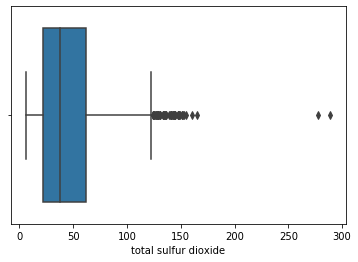

In [7]:
#It seems there are some outliers in thedata--Total sulphur dioxide column(when we describe the data),75% of the data is below 62 and the mean is 46 but the max
#value is 289.This looks like an outlier.Lets check this visually

import seaborn as sns

sns.boxplot(winedata['total sulfur dioxide'])

In [8]:
##We see the actual maximum value or the 100 percentile value is around 170.So 289 is definitely an outlier.
#It is very important to remove outliers from the data or else it would negatively effect the performance of the machine learning 
#algorithm.I would use z-score to identify and remove outliers.obs far from the mean are considered as outliers.Industry practise is 
#threshold,z-score >3 or z-score<3

import numpy as np
import scipy.stats as stats

z = np.abs(stats.zscore(winedata))
winedata = winedata[(z < 3).all(axis=1)]
winedata.shape




(1451, 12)

In [9]:
#Around 150 rows have been eliminated

In [10]:
 #Observations
   #All the attributes are floats
    #The target variable is int but it is categorical ranging from 3 to 5.Higher the value better the quality of the wine.

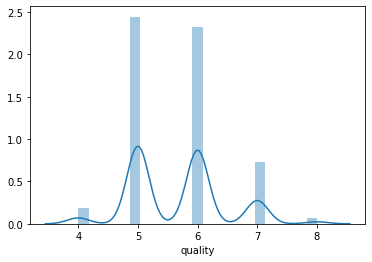

In [11]:
# Lets see the distribution of the target variable

import seaborn as sns

sns.distplot(winedata['quality'])


(array([ 47.,   0., 617.,   0.,   0., 586.,   0., 185.,   0.,  16.]),
 array([4. , 4.4, 4.8, 5.2, 5.6, 6. , 6.4, 6.8, 7.2, 7.6, 8. ]),
 <a list of 10 Patch objects>)

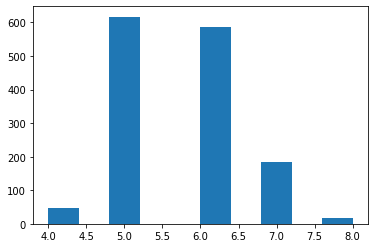

In [12]:
 #A histogram will look better on such categorical data
    
import matplotlib.pyplot as plt
%matplotlib inline
 
plt.hist(winedata['quality']) 

# There are 6 classes and the distribution is very imbalanced.We will deal with this while splitting the data into train and test 
# split.


In [13]:
#Maximum wines have qualities ranges between 5-6.Very few are as bad as 3 or as good as 8

In [14]:


# lets check the distribution of classes in the target variable

winedata['quality'].value_counts()


5    617
6    586
7    185
4     47
8     16
Name: quality, dtype: int64

In [15]:
#The distribution of the classes in the quality varibale looks pretty imbalanced.We will use sklearn's famous
# train_test_split function and pass the 'quality' variable in the stratify argument of this function.This will create a pretty balanced
# train test split

from sklearn.model_selection import train_test_split
train,test=train_test_split(winedata,test_size=0.25,random_state=42,stratify=winedata['quality'])
 

In [16]:
train.shape

(1088, 12)

In [17]:
train['quality'].value_counts()

5    463
6    439
7    139
4     35
8     12
Name: quality, dtype: int64

In [18]:
test['quality'].value_counts()

5    154
6    147
7     46
4     12
8      4
Name: quality, dtype: int64

In [19]:
# We will now check the correlation between the various features of the data

corrmat=train.corr()

corrmat

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.283296,0.689170,0.201356,0.176818,-0.139622,-0.097201,0.658574,-0.707988,0.189681,-0.016748,0.135449
volatile acidity,-0.283296,1.000000,-0.574614,0.007406,0.089696,-0.003263,0.101658,-0.015908,0.230333,-0.327856,-0.207128,-0.366323
citric acid,0.689170,-0.574614,1.000000,0.205376,0.094006,-0.063362,0.011233,0.367537,-0.511395,0.302046,0.176041,0.264437
residual sugar,0.201356,0.007406,0.205376,1.000000,0.152791,0.025401,0.125435,0.357633,-0.096453,0.082573,0.162656,0.041252
chlorides,0.176818,0.089696,0.094006,0.152791,1.000000,-0.083275,0.040374,0.314697,-0.187451,0.033528,-0.196187,-0.101990
free sulfur dioxide,-0.139622,-0.003263,-0.063362,0.025401,-0.083275,1.000000,0.652222,-0.026168,0.106548,0.071542,-0.058184,-0.054764
total sulfur dioxide,-0.097201,0.101658,0.011233,0.125435,0.040374,0.652222,1.000000,0.126922,-0.003579,-0.003143,-0.245118,-0.228114
density,0.658574,-0.015908,0.367537,0.357633,0.314697,-0.026168,0.126922,1.000000,-0.314720,0.137813,-0.467219,-0.161289
pH,-0.707988,0.230333,-0.511395,-0.096453,-0.187451,0.106548,-0.003579,-0.314720,1.000000,-0.034679,0.140138,-0.065744
sulphates,0.189681,-0.327856,0.302046,0.082573,0.033528,0.071542,-0.003143,0.137813,-0.034679,1.000000,0.226976,0.380876


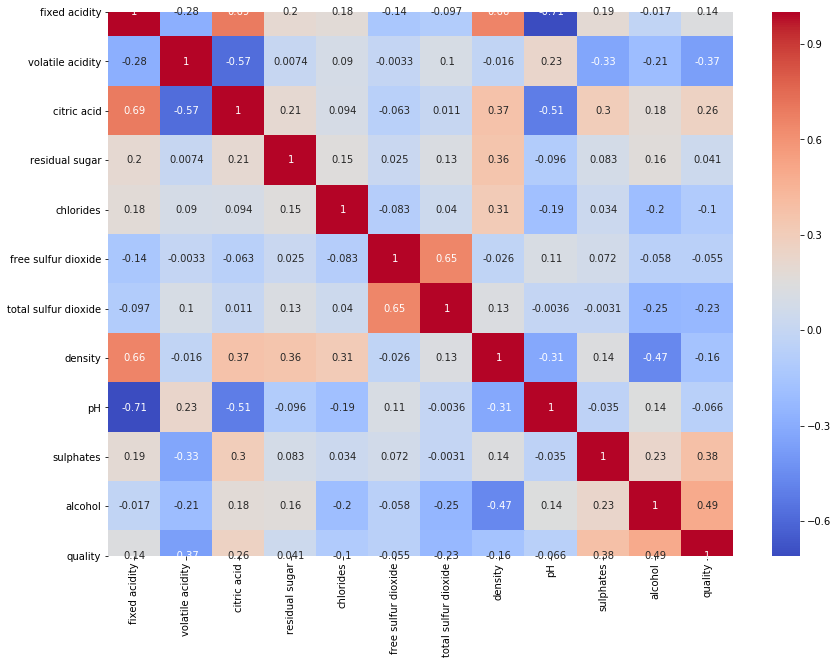

In [20]:
##Lets make the correlation matrix a bit visual,heatmap style

plt.subplots(figsize=(14,10))

sns.heatmap(corrmat,annot=True,cmap='coolwarm')

plt.show()

In [21]:
##All the features do not have a bearing on the quality the the wine--residual sugar,free sulphur dioxide,pH

#So we would drop these features from both train & test data

colstodrop=['residual sugar','free sulfur dioxide','pH']
train.drop(colstodrop,axis=1)
test.drop(colstodrop,axis=1)

#We can also drop--fixed acidity,chlorides,but we would see later

,fixed acidity,volatile acidity,citric acid,chlorides,total sulfur dioxide,density,sulphates,alcohol,quality
430,10.5,0.24,0.47,0.066,24.0,0.99780,0.90,11.0,7
90,7.9,0.52,0.26,0.079,140.0,0.99640,0.54,9.5,5
25,6.3,0.39,0.16,0.080,23.0,0.99550,0.56,9.3,5
752,7.6,0.54,0.13,0.097,66.0,0.99785,0.61,9.4,5
849,6.4,0.63,0.21,0.080,32.0,0.99689,0.66,9.8,5
...,...,...,...,...,...,...,...,...,...
694,9.0,0.47,0.31,0.084,125.0,0.99840,0.61,9.4,5
1311,6.5,0.51,0.15,0.064,27.0,0.99290,0.59,12.8,6
495,10.7,0.35,0.53,0.070,16.0,0.99720,0.65,11.0,8
740,8.3,0.76,0.29,0.075,16.0,0.99650,0.68,11.5,6


In [22]:
#If we look at the max and min of the independent variables there is a huge variation in the max and min values.
# This variation would affect the performance of our model.So we would scale these variables


from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()



#Create target variable y and predictor varibales X

###train set
train_X=train.drop('quality',axis=1)
train_y=train['quality']


###test set

test_X=test.drop('quality',axis=1)
test_y=test['quality']


#Start with scaling the predictor variables

train_X=scaler.fit_transform(train_X)
test_X=scaler.fit_transform(test_X)



In [23]:
#We would first try with decision tree

from sklearn.tree import DecisionTreeClassifier

tree=DecisionTreeClassifier(random_state=0)
tree.fit(train_X,train_y)
pred_y=tree.predict(test_X)

##Lets pull out the classification report for this


from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

print(metrics.classification_report(test_y,pred_y.round(),digits=3))





              precision    recall  f1-score   support

           4      0.000     0.000     0.000        12
           5      0.671     0.649     0.660       154
           6      0.559     0.578     0.569       147
           7      0.426     0.435     0.430        46
           8      0.000     0.000     0.000         4

    accuracy                          0.565       363
   macro avg      0.331     0.332     0.332       363
weighted avg      0.565     0.565     0.565       363



In [24]:
pred_y

array([6, 6, 6, 6, 5, 6, 6, 7, 6, 7, 5, 6, 6, 6, 6, 7, 5, 6, 6, 7, 6, 5,
       6, 5, 5, 6, 5, 5, 6, 5, 6, 5, 6, 5, 6, 6, 6, 6, 4, 6, 7, 6, 6, 5,
       6, 5, 4, 5, 6, 7, 5, 5, 6, 5, 6, 5, 5, 5, 5, 5, 7, 6, 5, 4, 5, 6,
       5, 4, 5, 5, 6, 5, 5, 5, 5, 7, 6, 5, 5, 7, 6, 5, 5, 5, 6, 6, 6, 6,
       5, 7, 5, 6, 5, 6, 5, 6, 6, 5, 5, 6, 5, 5, 5, 5, 6, 6, 5, 5, 6, 7,
       6, 6, 5, 5, 5, 6, 6, 5, 6, 5, 5, 6, 5, 6, 7, 6, 6, 7, 6, 7, 5, 7,
       7, 5, 6, 6, 6, 6, 6, 5, 6, 6, 5, 6, 5, 7, 7, 5, 5, 7, 6, 5, 5, 6,
       6, 6, 6, 6, 6, 6, 5, 7, 6, 5, 5, 5, 6, 5, 7, 6, 6, 5, 5, 6, 6, 7,
       6, 6, 6, 6, 6, 5, 5, 7, 6, 5, 6, 6, 7, 5, 6, 6, 5, 5, 6, 5, 6, 7,
       5, 5, 5, 7, 5, 5, 6, 7, 6, 5, 5, 6, 5, 5, 5, 4, 5, 5, 5, 6, 6, 5,
       5, 5, 4, 6, 4, 5, 6, 6, 5, 5, 5, 6, 7, 7, 7, 6, 4, 5, 6, 6, 6, 5,
       7, 6, 7, 5, 6, 5, 5, 5, 7, 6, 6, 7, 5, 6, 6, 8, 5, 5, 5, 6, 7, 7,
       6, 6, 6, 7, 8, 6, 6, 7, 5, 6, 8, 7, 5, 6, 6, 5, 6, 5, 6, 6, 5, 6,
       5, 7, 5, 7, 5, 7, 5, 6, 6, 6, 5, 5, 5, 6, 6,

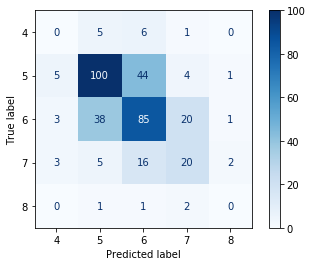

In [41]:
from sklearn.metrics import plot_confusion_matrix
labels=sorted(winedata['quality'].unique().tolist())

plot_confusion_matrix(tree,test_X,test_y,display_labels=labels,cmap=plt.cm.Blues)

In [43]:
#Calculate roc_auc_score  with multi-class parameter

from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score

###cross validation score using roc_auc_ovr

accuracy=cross_val_score(tree,train_X,train_y,scoring='roc_auc_ovr',cv=10)
print('cross-validation score with roc_auc_ovr scoring',accuracy.mean())


rocaucscore=roc_auc_score(test_y,tree.predict_proba(test_X),multi_class='ovr')
print('roc_auc_score:',rocaucscore)



cross-validation score with roc_auc_ovr scoring 0.6195116952613269
roc_auc_score: 0.5990075010414918


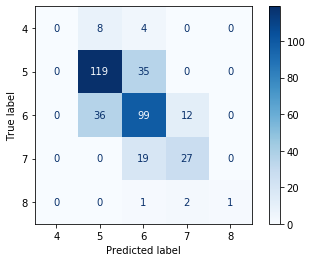

In [47]:
#Random forest is ensemble learning technique that uses multiple decision trees and then gives a prediction basis the 
#majority vote

from sklearn.ensemble import RandomForestClassifier
forest=RandomForestClassifier(n_estimators=100,random_state=42)
forest.fit(train_X,train_y)

pred_y=forest.predict(test_X)

plot_confusion_matrix(forest,test_X,test_y,display_labels=labels,cmap=plt.cm.Blues)



In [50]:
#cross-validation score using auc_roc_ovr(this is multiclass classification...
#roc_auc_score is calculated one class against the rest)

accuracy=cross_val_score(forest,train_X,train_y,scoring='roc_auc_ovr',cv=10)
print('cross_val_score:',accuracy.mean())

cross_val_score: 0.8237459590940761


In [52]:
#roc_auc_score with multi-class parameter

forest_rocaucscore=roc_auc_score(test_y,forest.predict_proba(test_X),multi_class='ovr')
print('roc_auc_score:',forest_rocaucscore)

roc_auc_score: 0.8214406488053972


In [53]:
#Lets now pull out the classification report

print(metrics.classification_report(test_y,pred_y.round(),digits=3))

              precision    recall  f1-score   support

           4      0.000     0.000     0.000        12
           5      0.730     0.773     0.751       154
           6      0.627     0.673     0.649       147
           7      0.659     0.587     0.621        46
           8      1.000     0.250     0.400         4

    accuracy                          0.678       363
   macro avg      0.603     0.457     0.484       363
weighted avg      0.658     0.678     0.664       363



C:\Users\gunja\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [60]:
#the roc_auc_score and the cross_val_score for random forest looks good.But still the recall of the minority classes is not good
#We will increase the recall of the monority classes by oversampling the minority classes.For this we will use the 
#Smote algorithm

#SMOTE(synthetic minority oversampling) algorithm creates synthetic minority class samples to increase the representation 
#of the minority classes

#Import SMOTE module

#pip install imblearn

from imblearn.over_sampling import SMOTE

sm=SMOTE(random_state=42)

train_X_res,train_y_res=sm.fit_sample(train_X,train_y.ravel())

###Again fit the random forest

forest.fit(train_X_res,train_y_res.ravel())


pred_y=forest.predict(test_X)




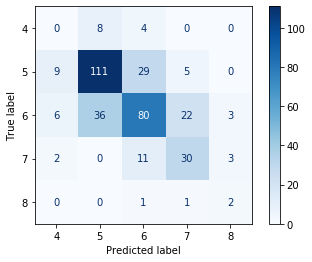

In [63]:
plot_confusion_matrix(forest,test_X,test_y,display_labels=labels,cmap=plt.cm.Blues)



In [64]:
#Classification report

print(metrics.classification_report(test_y,pred_y.round(),digits=3))



              precision    recall  f1-score   support

           4      0.000     0.000     0.000        12
           5      0.716     0.721     0.718       154
           6      0.640     0.544     0.588       147
           7      0.517     0.652     0.577        46
           8      0.250     0.500     0.333         4

    accuracy                          0.614       363
   macro avg      0.425     0.483     0.443       363
weighted avg      0.631     0.614     0.620       363



In [65]:
#cross val score

accuracy=cross_val_score(forest,train_X,train_y,scoring='roc_auc_ovr',cv=10)
print(accuracy.mean())

0.8237459590940761


In [67]:
#roc_auc_score with multi-class parameter

SMOTE_rocaucscore=roc_auc_score(test_y,forest.predict_proba(test_X),multi_class='ovr')

print(SMOTE_rocaucscore)

0.7959312149894526


In [ ]:
#Conclusion--Random Forest gave us better results than decision trees ..thouugh the minority classes were not predicted 
#properly.
#Even SMOTE though improved the recall of class--8 a monority class but decreased the roc_auc_score of the model on the whole.